In [1]:
%matplotlib inline
import numpy as np

from scipy.stats import linregress
from scipy.stats import gmean
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rubisco_data

import matplotlib.colors
import seaborn as sns
import pandas as pd

In [2]:
# Load the data from Excel, remove data points that are not comparable.
# raw_kin_df is everything in the file, kin_df is the subset with all relevant kinetic data.
raw_kin_df, kin_df = rubisco_data.load_rubisco_data()

# Subset the data in various ways for future use
raw_kin_df, savir_df, nonsavir_df = rubisco_data.filter_data(raw_kin_df)

# Merge multiple measurements of the same organism by taking the median value.
merged_kin_df = rubisco_data.merge_organisms(raw_kin_df)

# Group by RuBisCO form
grouped_form = merged_kin_df.groupby('isoform')

# Markers we use for plotting below.
markers = 'o><^dsphH*'

cnames = ["windows blue", "amber", "greyish brown", "dusty purple", "dusty teal", "dusty red", ]
named_colors = sns.xkcd_palette(cnames)

In [3]:
print(raw_kin_df.shape[0], 'total WT RuBisCOs')
print(raw_kin_df.species.unique().size, 'total unique species')
print(kin_df.shape[0], 'RuBisCOs with all core kinetic data measured')
print(merged_kin_df.shape[0], 'data points post-merge')

378 total WT RuBisCOs
304 total unique species
208 RuBisCOs with all core kinetic data measured
305 data points post-merge


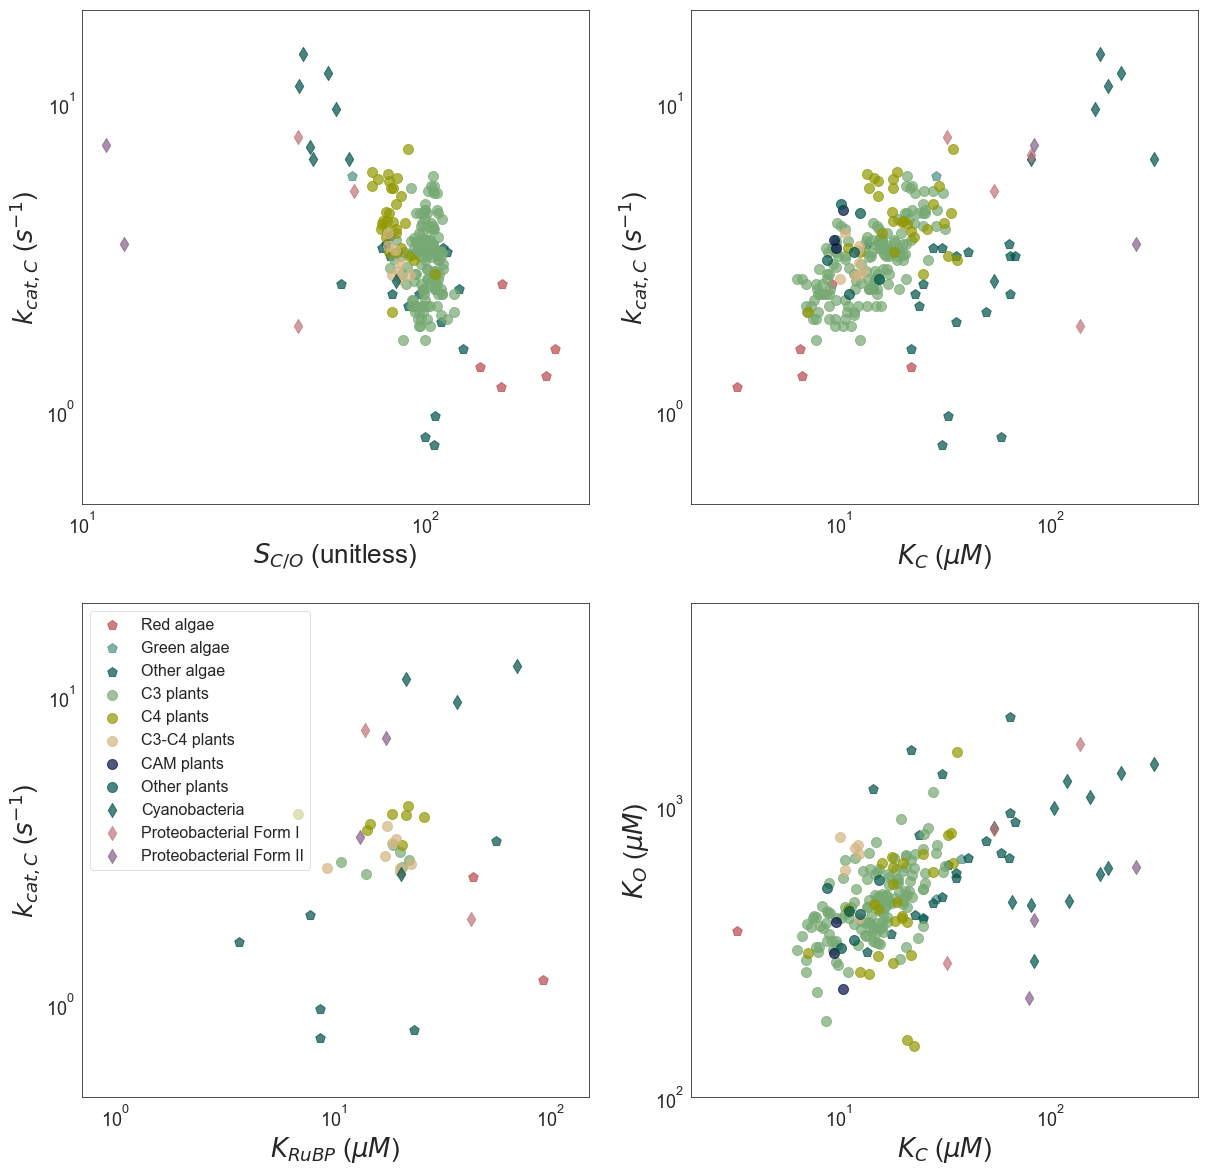

In [5]:
figure = plt.figure(figsize=(20,20))

F1_data = merged_kin_df[merged_kin_df.isoform == '1']
F2_data = merged_kin_df[merged_kin_df.isoform == '2']

group_mapping = {'C3 plants': 'C3 plants',
                 'C3-C4 plants': 'C3-C4 plants',
                 'Cyanobacteria': 'Cyanobacteria',
                 'C4 plants': 'C4 plants',
                 'CAM plants': 'CAM plants',
                 'Green algae': 'Green algae',
                 'Red algae': 'Red algae',
                 'Alphaproteobacteria': 'Proteobacterial Form I',
                 'Betaproteobacteria': 'Proteobacterial Form I',
                 'Gammaproteobacteria': 'Proteobacterial Form I',
                 'Diatoms': 'Other algae',
                 'Chromophyte algae': 'Other algae',
                 'Rhodophyte algae': 'Other algae',
                 'Haptophyte algae': 'Other algae',
                 'Macroalgae': 'Other algae',
                 'Carnivorous plants': 'Other plants',
                 'Basal angiosperm': 'Other plants',
                 'Gymnosperm': 'Other plants',
                }
grouped_taxa = F1_data.set_index('taxonomy').groupby(group_mapping)

titles = {'S': '$S_{C/O}$', 'vC': '$k_{cat,C}$', 'KC':
          '$K_C$', 'vO': '$k_{cat,O}$', 'KO': '$K_O$',
          'KRuBP': '$K_{RuBP}$'}
units = {'S': 'unitless', 'vC': '$s^{-1}$', 'KC':
         '$\mu M$', 'vO': '$s^{-1}$', 'KO': '$\mu M$',
         'KRuBP': '$\mu M$'}
marker_mapping = {
    'C3 plants': 'o',
    'C3-C4 plants': 'o',
    'C4 plants': 'o',
    'CAM plants': 'o',
    'Other plants': 'o',
    'Cyanobacteria': 'd',
    'Proteobacterial Form I': 'd',
    'Green algae': 'p',
    'Red algae': 'p',
    'Other algae': 'p',
}

color_mapping = {
    'C3 plants': 'dusty green',
    'C3-C4 plants': 'very light brown',
    'C4 plants': 'pea soup',
    'CAM plants': 'navy blue',
    'Other plants': 'dark blue green',
    'Cyanobacteria': 'dark blue green',
    'Proteobacterial Form I': 'dusty rose',
    'Green algae': 'dusty teal',
    'Red algae': 'dusty red',
    'Other algae': 'dark blue green',
}
taxa_to_plot = ['Red algae', 'Green algae', 'Other algae', 
                'C3 plants', 'C4 plants', 'C3-C4 plants', 'CAM plants', 'Other plants',
                'Cyanobacteria', 'Proteobacterial Form I' ]

sns.set_style('white')

def make_subplot(xvar, yvar):
    plt.xscale('log')
    plt.yscale('log')

    for i, group in enumerate(taxa_to_plot):
        gdf = grouped_taxa.get_group(group)

        cname = color_mapping.get(group, 'dark grey')
        c = sns.xkcd_rgb[cname]
        marker = marker_mapping.get(group, 'o')

        plt.scatter(gdf[xvar], gdf[yvar],  c=[c], s=100, marker=marker, label=group, alpha=0.7)
        
    cname = 'dusty purple'
    c = sns.xkcd_rgb[cname]
    plt.scatter(F2_data[xvar], F2_data[yvar],  c=[c], s=100, marker='d',
                label='Proteobacterial Form II', alpha=0.7)
    
    xlabel = '%s (%s)' % (titles[xvar], units[xvar])
    ylabel = '%s (%s)' % (titles[yvar], units[yvar])
    
    plt.xlabel(xlabel, fontsize=26)
    plt.ylabel(ylabel, fontsize=26)

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

# vC vs SC/O
plt.subplot('221')

make_subplot('S', 'vC')
plt.xlim(10, 300)
plt.ylim(5e-1, 20)

# kcatC vs KC
plt.subplot('222')

make_subplot('KC', 'vC')

plt.ylim(5e-1, 20)
plt.xlim(2, 5e2)

# kcatC vs KRuBP
plt.subplot('223')

make_subplot('KRuBP', 'vC')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=16, loc=2, frameon=True, framealpha=0.6)
plt.ylim(5e-1, 20)
plt.xlim(0.7, 1.5e2)

# KO vs KC
plt.subplot('224')

make_subplot('KC', 'KO')

plt.ylim(1e2, 5e3)
plt.xlim(2, 5e2)

plt.savefig('figS5/figS5_plots.png', dpi=600)
plt.savefig('figS5/figS5_plots.png')
plt.show()